<a href="https://colab.research.google.com/github/Kadomium/Time_Series_Forecasting_In_Python/blob/main/market_dataform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# データ変換

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

14列以降をdrop
最初2行をdropした上で1行目をdate,yen/doller_open,yen/doller_high,yen/doller_low,yen/doller_last,eur/usd_open,eur/usd_high,eur/usd_low,eur/usd_last,eur/yen_open,eur/yen_high,eur/yen_low,eur/yen_lastにする

In [ ]:
df = pd.read_csv('date_raw.csv')
df.head()
#頭2行を削除
df = df.drop([0, 1], axis=0).reset_index(drop=True)
#14行目以降を削除
df = df.iloc[:, :13]
#名前の付け直し
df = df.set_axis(['date', 'yen_usd_open', 'yen_usd_high', 'yen_usd_low', 'yen_usd_last','eur_usd_open', 'eur_usd_high', 'eur_usd_low', 'eur_usd_last','eur_yen_open', 'eur_yen_high', 'eur_yen_low', 'eur_yen_last'],axis='columns')
#数字を文字列ではなく数字と認識してもらう
df[['yen_usd_open', 'yen_usd_high', 'yen_usd_low', 'yen_usd_last','eur_usd_open', 'eur_usd_high', 'eur_usd_low', 'eur_usd_last','eur_yen_open', 'eur_yen_high', 'eur_yen_low', 'eur_yen_last']] = df[['yen_usd_open', 'yen_usd_high', 'yen_usd_low', 'yen_usd_last','eur_usd_open', 'eur_usd_high', 'eur_usd_low', 'eur_usd_last','eur_yen_open', 'eur_yen_high', 'eur_yen_low', 'eur_yen_last']].apply(pd.to_numeric, errors='coerce')
df.head()

,2000/1/1,JPY Curncy,Unnamed: 2,Unnamed: 3,Unnamed: 4,EUR Curncy,Unnamed: 6,Unnamed: 7,Unnamed: 8,EURJPY Curncy,...,Unnamed: 39,Unnamed: 40,HKD Curncy,Unnamed: 42,Unnamed: 43,Unnamed: 44,CNY Curncy,Unnamed: 46,Unnamed: 47,Unnamed: 48
0,NaN,ﾄﾞﾙ円,NaN,NaN,NaN,ﾕｰﾛﾄﾞﾙ,NaN,NaN,NaN,ﾕｰﾛ円,...,NaN,NaN,香港ﾄﾞﾙ,NaN,NaN,NaN,中国元,NaN,NaN,NaN
1,NaN,PX_OPEN,PX_HIGH,PX_LOW,PX_LAST,PX_OPEN,PX_HIGH,PX_LOW,PX_LAST,PX_OPEN,...,PX_LOW,PX_LAST,PX_OPEN,PX_HIGH,PX_LOW,PX_LAST,PX_OPEN,PX_HIGH,PX_LOW,PX_LAST
2,2000/1/1,102.45,102.59,102.12,102.51,1.009,1.0136,1.0046,1.0062,103.49,...,7.98,8.0167,7.772,7.7744,7.7718,7.7735,8.2795,8.2795,8.2795,8.2795
3,2000/1/2,102.45,102.59,102.12,102.51,1.009,1.0136,1.0046,1.0062,103.49,...,7.98,8.0167,7.772,7.7744,7.7718,7.7735,8.2795,8.2795,8.2795,8.2795
4,2000/1/3,102.14,102.17,101.4,101.45,1.0073,1.0285,1.0052,1.0243,102.89,...,7.8794,7.8884,7.7735,7.7759,7.7735,7.7759,8.2796,8.2799,8.2787,8.2798


In [ ]:
df.isna().sum()

,0
date,0
yen_usd_open,0
yen_usd_high,0
yen_usd_low,0
yen_usd_last,0
eur_usd_open,0
eur_usd_high,0
eur_usd_low,0
eur_usd_last,0
eur_yen_open,0


In [ ]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['date'].dtype

dtype('<M8[ns]')

In [ ]:
columns_to_drop = [col for col in df.columns if 'open' in col or 'high' in col or 'low' in col]
df = df.drop(columns=columns_to_drop)

In [ ]:
df.head()

,date,yen_usd_last,eur_usd_last,eur_yen_last
0,2000-01-01,102.51,1.0062,103.08
1,2000-01-02,102.51,1.0062,103.08
2,2000-01-03,101.45,1.0243,103.93
3,2000-01-04,103.22,1.0296,106.34
4,2000-01-05,104.14,1.0321,107.63


In [ ]:
df['yen_usd_last'].dtype

dtype('float64')

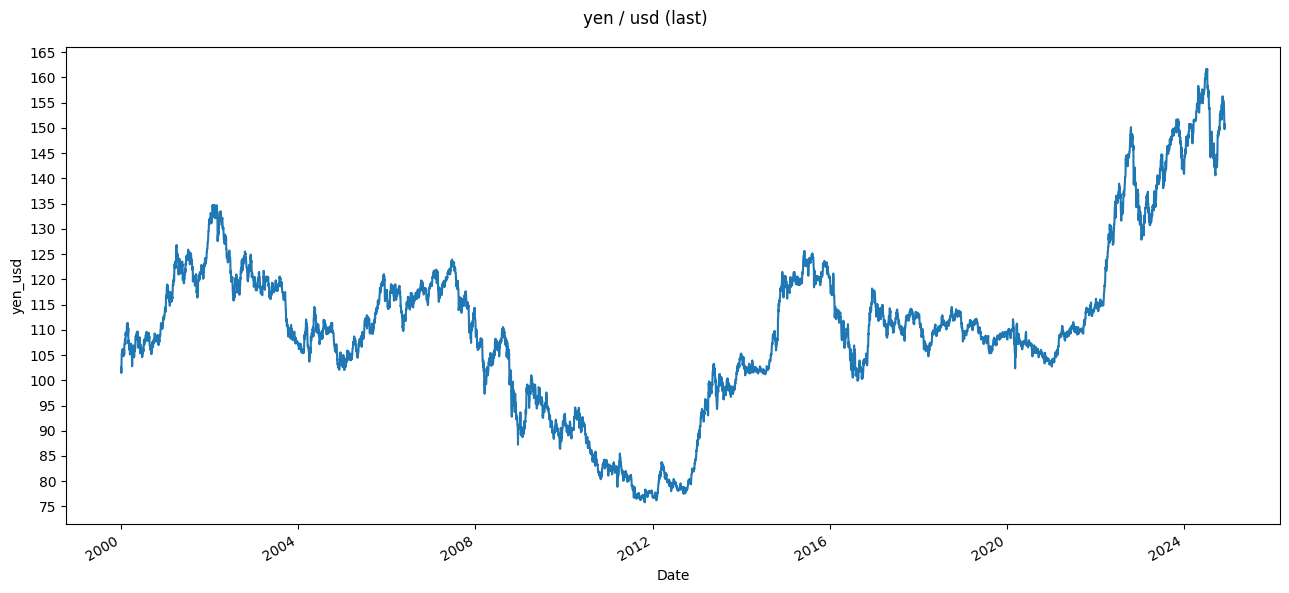

In [ ]:
fig, ax = plt.subplots(figsize=(13,6))

ax.plot(df.date, df.yen_usd_last)
fig.suptitle('yen / usd (last)')
ax.set_xlabel('Date')
ax.set_ylabel('yen_usd')

ax.yaxis.set_major_locator(MultipleLocator(5))

fig.autofmt_xdate()
plt.tight_layout()

In [ ]:
def calculate_rolling_average(column_name, df):
    # 列名からnを取得
    n = int(column_name.split('_')[-1][2:])  # 'yen_usd_MA5' なら 5 を取得

    # 過去nつの値の平均を計算
    df[column_name] = df['yen_usd_last'].rolling(window=n).mean()

    # 最初のn-1行をn行目の値で埋める
    if len(df) >= n:
        df.loc[:n-2, column_name] = df.loc[n-1, column_name]

    return df


In [ ]:
df = calculate_rolling_average('yen_usd_MA25', df)

In [ ]:
df = calculate_rolling_average('yen_usd_MA250', df)

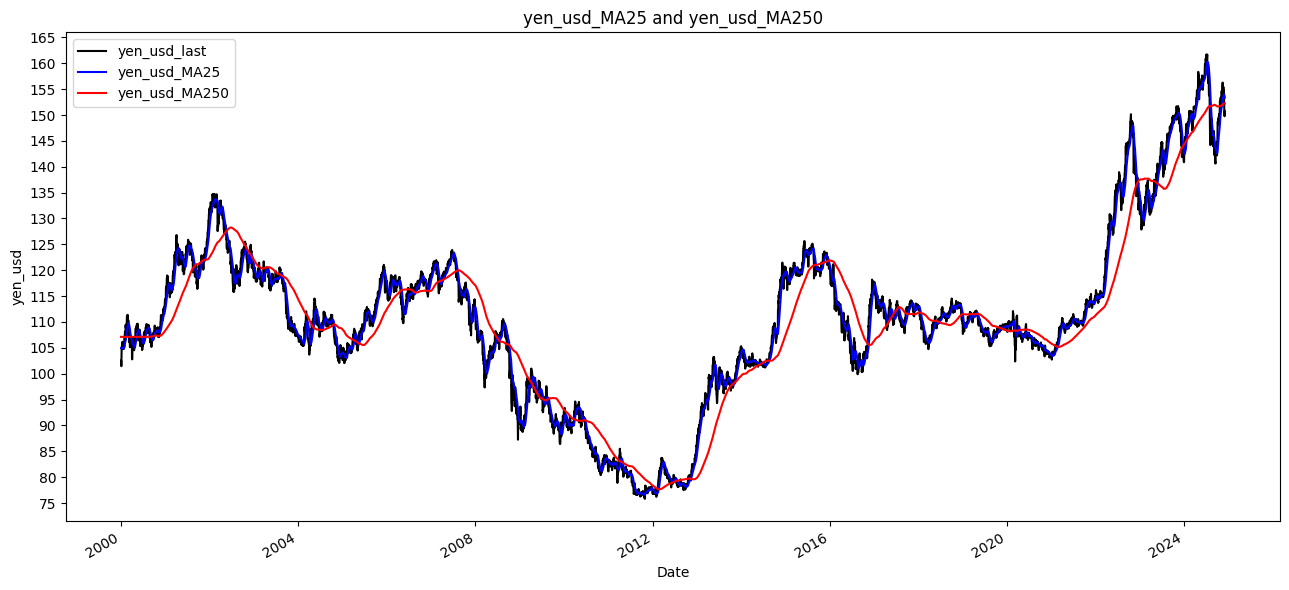

In [ ]:
fig, ax = plt.subplots(figsize=(13,6))

ax.plot(df.date, df.yen_usd_last, label='yen_usd_last', color='black')
plt.plot(df.date, df['yen_usd_MA25'], label='yen_usd_MA25', color='blue')
plt.plot(df.date, df['yen_usd_MA250'], label='yen_usd_MA250', color='red')

ax.set_xlabel('Date')
ax.set_ylabel('yen_usd')
plt.title('yen_usd_MA25 and yen_usd_MA250')

plt.legend()

ax.yaxis.set_major_locator(MultipleLocator(5))

fig.autofmt_xdate()
plt.tight_layout()
#plt.savefig('figures/yen_usd_MA25 and yen_usd_MA250.png', dpi=300)

In [ ]:
df['prev_yen_usd_MA25'] = df['yen_usd_MA25'].shift(1)
df['prev_yen_usd_MA250'] = df['yen_usd_MA250'].shift(1)

In [ ]:
df['yen_usd_sell'] = df.apply(
    lambda row: row['yen_usd_last'] if row['yen_usd_MA250'] >= row['yen_usd_MA25'] and row['prev_yen_usd_MA25'] >= row['prev_yen_usd_MA250'] else 0,
    axis=1
)
df['yen_usd_buy'] = df.apply(
    lambda row: row['yen_usd_last'] if row['yen_usd_MA25'] >= row['yen_usd_MA250'] and row['prev_yen_usd_MA250'] >= row['prev_yen_usd_MA25'] else 0,
    axis=1
)
df['yen_usd_sell_num'] = (df['yen_usd_sell'] != 0).cumsum()
df['yen_usd_buy_num'] = (df['yen_usd_buy'] != 0).cumsum()
df['yen_usd_buy_over'] = df['yen_usd_buy_num'] - df['yen_usd_sell_num']

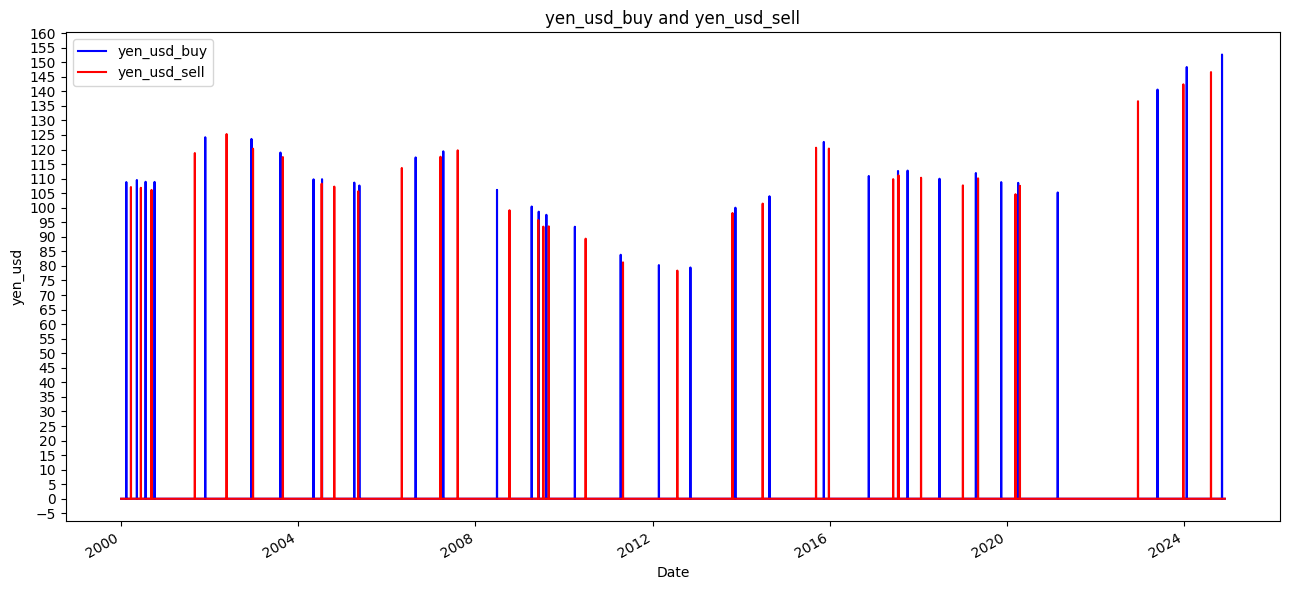

In [ ]:
fig, ax = plt.subplots(figsize=(13,6))

plt.plot(df.date, df['yen_usd_buy'], label='yen_usd_buy', color='blue')
plt.plot(df.date, df['yen_usd_sell'], label='yen_usd_sell', color='red')

ax.set_xlabel('Date')
ax.set_ylabel('yen_usd')
plt.title('yen_usd_buy and yen_usd_sell')

plt.legend()

ax.yaxis.set_major_locator(MultipleLocator(5))

fig.autofmt_xdate()
plt.tight_layout()

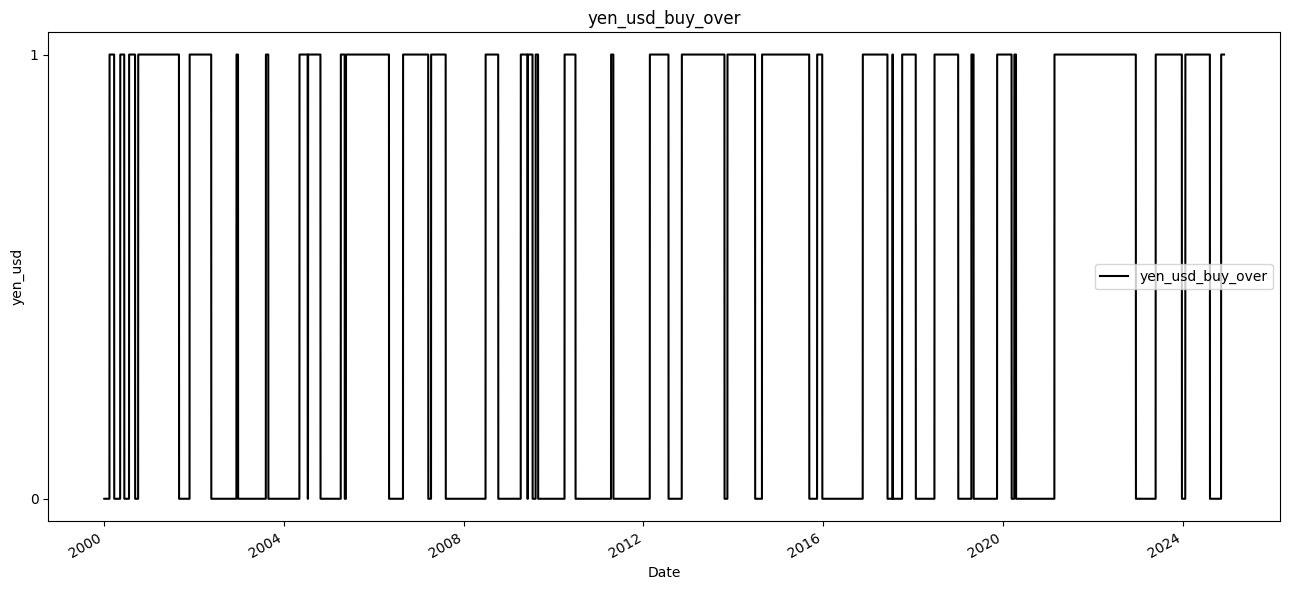

In [ ]:
fig, ax = plt.subplots(figsize=(13,6))

plt.plot(df.date, df['yen_usd_buy_over'], label='yen_usd_buy_over', color='black')

ax.set_xlabel('Date')
ax.set_ylabel('yen_usd')
plt.title('yen_usd_buy_over')

plt.legend()

ax.yaxis.set_major_locator(MultipleLocator(1))

fig.autofmt_xdate()
plt.tight_layout()

In [ ]:
df['yen_usd_profit'] = 0
for i in range(1, len(df)):
    df.loc[i, 'yen_usd_profit'] = (
        df.loc[i - 1, 'yen_usd_profit'] - df.loc[i, 'yen_usd_buy'] + df.loc[i, 'yen_usd_sell']
    )

if df.iloc[-1]['yen_usd_buy_over'] > 0:
    df.loc[df.index[-1], 'yen_usd_profit'] += df.iloc[-1]['yen_usd_last']


In [ ]:
df['yen_usd_profit_hold'] = df['yen_usd_last'] - df['yen_usd_last'][1]

In [ ]:
df.head()

,date,yen_usd_last,eur_usd_last,eur_yen_last,yen_usd_MA25,yen_usd_MA250,prev_yen_usd_MA25,prev_yen_usd_MA250,yen_usd_sell,yen_usd_buy,yen_usd_sell_num,yen_usd_buy_num,yen_usd_buy_over,yen_usd_profit,yen_usd_profit_hold
0,2000-01-01,102.51,1.0062,103.08,104.9228,107.11552,NaN,NaN,0.0,0.0,0,0,0,0.0,0.00
1,2000-01-02,102.51,1.0062,103.08,104.9228,107.11552,104.9228,107.11552,0.0,0.0,0,0,0,0.0,0.00
2,2000-01-03,101.45,1.0243,103.93,104.9228,107.11552,104.9228,107.11552,0.0,0.0,0,0,0,0.0,-1.06
3,2000-01-04,103.22,1.0296,106.34,104.9228,107.11552,104.9228,107.11552,0.0,0.0,0,0,0,0.0,0.71
4,2000-01-05,104.14,1.0321,107.63,104.9228,107.11552,104.9228,107.11552,0.0,0.0,0,0,0,0.0,1.63


In [ ]:
df.tail()

,date,yen_usd_last,eur_usd_last,eur_yen_last,yen_usd_MA25,yen_usd_MA250,prev_yen_usd_MA25,prev_yen_usd_MA250,yen_usd_sell,yen_usd_buy,yen_usd_sell_num,yen_usd_buy_num,yen_usd_buy_over,yen_usd_profit,yen_usd_profit_hold
9098,2024-11-28,151.55,1.0552,159.90,153.8316,152.25836,153.8900,152.25780,0.0,0.0,34,35,1,-131.88,49.04
9099,2024-11-29,149.77,1.0577,158.41,153.7372,152.25180,153.8316,152.25836,0.0,0.0,34,35,1,-131.88,47.26
9100,2024-11-30,149.77,1.0577,158.41,153.6632,152.24520,153.7372,152.25180,0.0,0.0,34,35,1,-131.88,47.26
9101,2024-12-01,149.77,1.0577,158.41,153.4688,152.23804,153.6632,152.24520,0.0,0.0,34,35,1,-131.88,47.26
9102,2024-12-02,150.69,1.0527,158.63,153.3788,152.23548,153.4688,152.23804,0.0,0.0,34,35,1,18.81,48.18


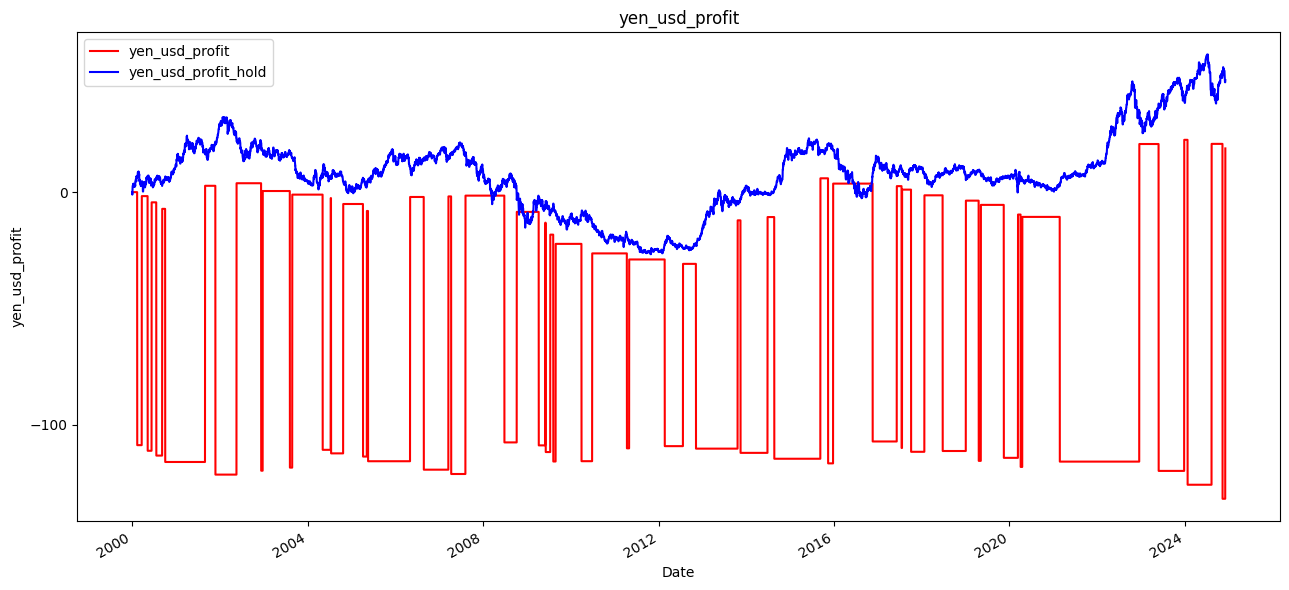

In [ ]:
fig, ax = plt.subplots(figsize=(13,6))

plt.plot(df.date, df['yen_usd_profit'], label='yen_usd_profit', color='red')
plt.plot(df.date, df['yen_usd_profit_hold'], label='yen_usd_profit_hold', color='blue')

ax.set_xlabel('Date')
ax.set_ylabel('yen_usd_profit')
plt.title('yen_usd_profit')

plt.legend()

ax.yaxis.set_major_locator(MultipleLocator(100))

fig.autofmt_xdate()
plt.tight_layout()

ボリンジャーバンド

In [ ]:
def calculate_bollinger_band(column_name, df):
    # 列名からnを取得
    n = int(column_name.split('_')[-1][2:])  # 'yen_usd_MA5' なら 5 を取得

    # 過去nつの値の平均を計算
    df[column_name] = df['yen_usd_last'].rolling(window=n).std()

    # 最初のn-1行をn行目の値で埋める
    if len(df) >= n:
        df.loc[:n-2, column_name] = df.loc[n-1, column_name]

    return df

In [ ]:
df = calculate_bollinger_band('yen_usd_SD25', df)

In [ ]:
df['yen_usd_up25'] = df['yen_usd_MA25'] +(2 * df['yen_usd_SD25'])
df['yen_usd_low25'] = df['yen_usd_MA25'] -(2 * df['yen_usd_SD25'])
df['yen_usd_up25_2'] = df['yen_usd_MA25'] +(3 * df['yen_usd_SD25'])
df['yen_usd_low25_2'] = df['yen_usd_MA25'] -(3 * df['yen_usd_SD25'])
df['yen_usd_sup25'] = df['yen_usd_last'] - df['yen_usd_up25']
df['yen_usd_sub25'] = df['yen_usd_low25'] - df['yen_usd_last']

In [ ]:
df['prev_yen_usd_last'] = df['yen_usd_last'].shift(1)
df['prev_yen_usd_up25'] = df['yen_usd_up25'].shift(1)
df['prev_yen_usd_low25'] = df['yen_usd_low25'].shift(1)
df['prev_yen_usd_up25_2'] = df['yen_usd_up25_2'].shift(1)
df['prev_yen_usd_low25_2'] = df['yen_usd_low25_2'].shift(1)

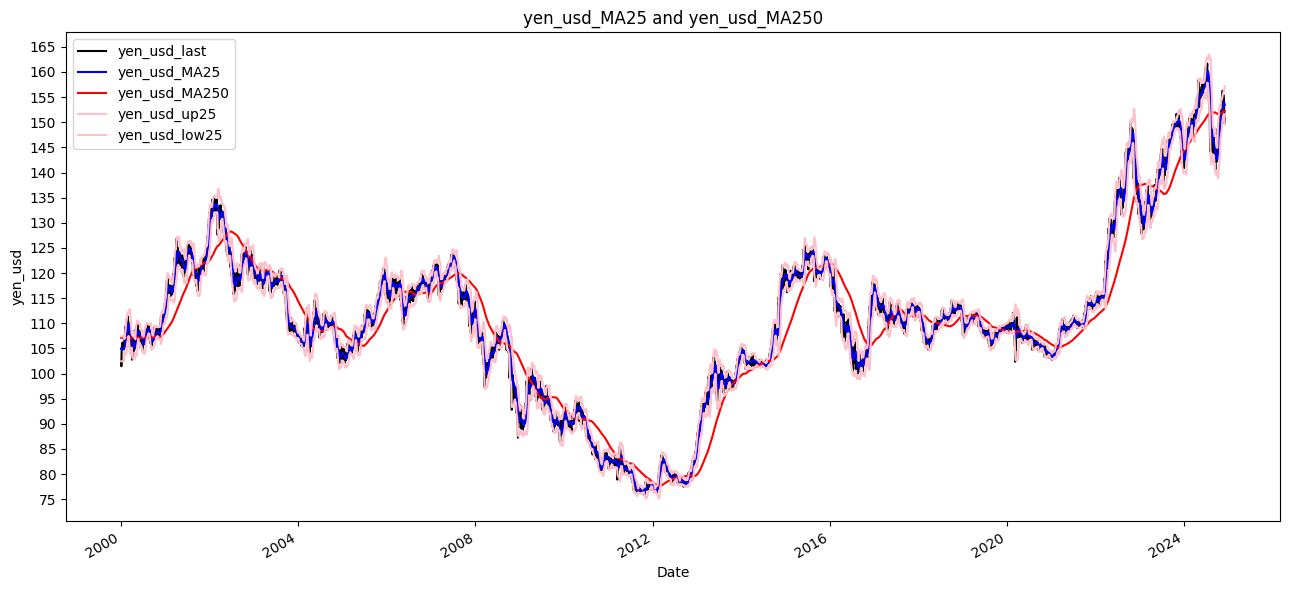

In [ ]:
fig, ax = plt.subplots(figsize=(13,6))

ax.plot(df.date, df.yen_usd_last, label='yen_usd_last', color='black')
plt.plot(df.date, df['yen_usd_MA25'], label='yen_usd_MA25', color='blue')
plt.plot(df.date, df['yen_usd_MA250'], label='yen_usd_MA250', color='red')
plt.plot(df.date, df['yen_usd_up25'], label='yen_usd_up25', color='pink')
plt.plot(df.date, df['yen_usd_low25'], label='yen_usd_low25', color='pink')


ax.set_xlabel('Date')
ax.set_ylabel('yen_usd')
plt.title('Bollinger_Band_of_yen_usd_MA25')

plt.legend()

ax.yaxis.set_major_locator(MultipleLocator(5))

fig.autofmt_xdate()
plt.tight_layout()

In [ ]:
df.shape

(9103, 20)

In [ ]:
df.head()

,date,yen_usd_last,eur_usd_last,eur_yen_last,yen_usd_MA25,yen_usd_MA250,prev_yen_usd_MA25,prev_yen_usd_MA250,yen_usd_sell,yen_usd_buy,yen_usd_sell_num,yen_usd_buy_num,yen_usd_buy_over,yen_usd_profit,yen_usd_profit_hold,yen_usd_SD25,yen_usd_up25,yen_usd_low25,yen_usd_sup25,yen_usd_sub25
0,2000-01-01,102.51,1.0062,103.08,104.9228,107.11552,NaN,NaN,0.0,0.0,0,0,0,0.0,0.00,1.236378,107.395555,102.450045,-4.885555,-0.059955
1,2000-01-02,102.51,1.0062,103.08,104.9228,107.11552,104.9228,107.11552,0.0,0.0,0,0,0,0.0,0.00,1.236378,107.395555,102.450045,-4.885555,-0.059955
2,2000-01-03,101.45,1.0243,103.93,104.9228,107.11552,104.9228,107.11552,0.0,0.0,0,0,0,0.0,-1.06,1.236378,107.395555,102.450045,-5.945555,1.000045
3,2000-01-04,103.22,1.0296,106.34,104.9228,107.11552,104.9228,107.11552,0.0,0.0,0,0,0,0.0,0.71,1.236378,107.395555,102.450045,-4.175555,-0.769955
4,2000-01-05,104.14,1.0321,107.63,104.9228,107.11552,104.9228,107.11552,0.0,0.0,0,0,0,0.0,1.63,1.236378,107.395555,102.450045,-3.255555,-1.689955


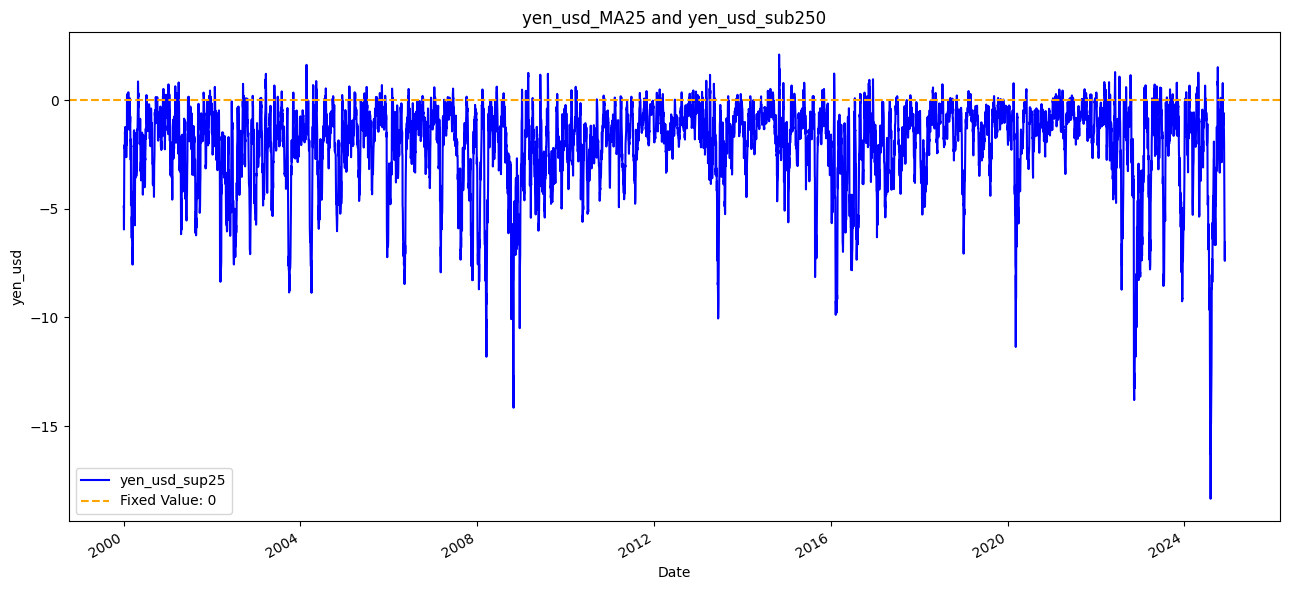

In [ ]:
fig, ax = plt.subplots(figsize=(13,6))

plt.plot(df.date, df['yen_usd_sup25'], label='yen_usd_sup25', color='blue')

ax.set_xlabel('Date')
ax.set_ylabel('yen_usd')
plt.title('yen_usd_MA25 and yen_usd_sub250')

fixed_value = 0
ax.axhline(y=fixed_value, color='orange', linestyle='--', label=f'Fixed Value: {fixed_value}')


plt.legend()

ax.yaxis.set_major_locator(MultipleLocator(5))

fig.autofmt_xdate()
plt.tight_layout()

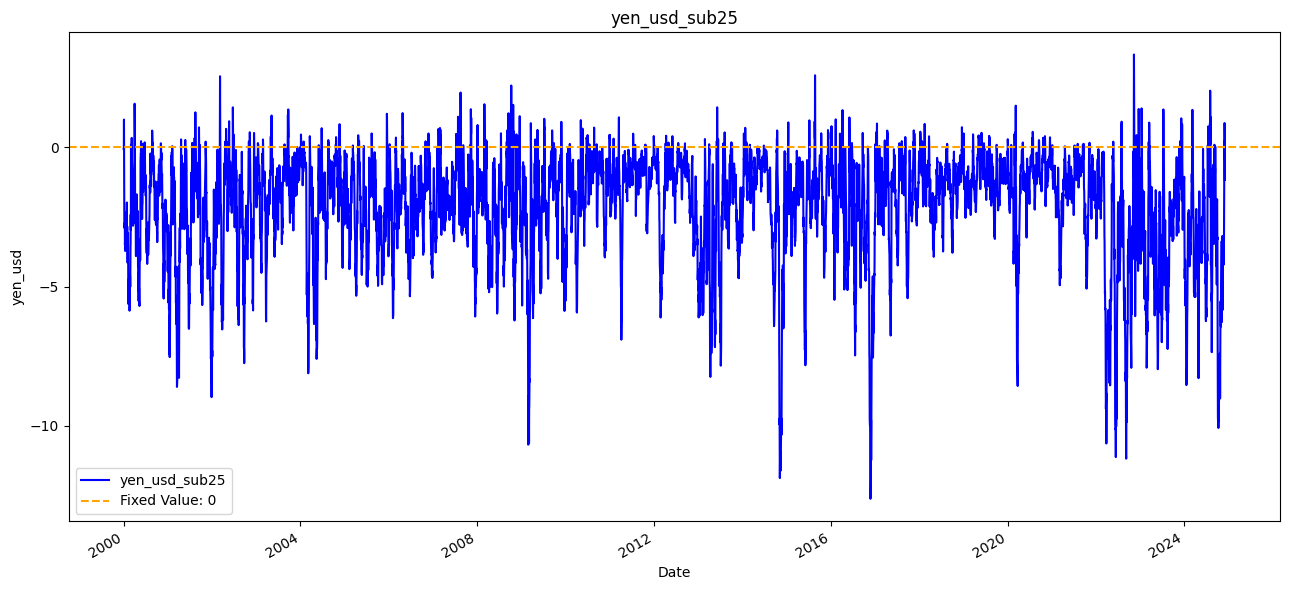

In [ ]:
fig, ax = plt.subplots(figsize=(13,6))

plt.plot(df.date, df['yen_usd_sub25'], label='yen_usd_sub25', color='blue')

ax.set_xlabel('Date')
ax.set_ylabel('yen_usd')
plt.title('yen_usd_sub25')

fixed_value = 0
ax.axhline(y=fixed_value, color='orange', linestyle='--', label=f'Fixed Value: {fixed_value}')


plt.legend()

ax.yaxis.set_major_locator(MultipleLocator(5))

fig.autofmt_xdate()
plt.tight_layout()

In [ ]:
df['yen_usd_sell_B'] = df.apply(
    lambda row: row['yen_usd_last'] if row['yen_usd_last'] >= row['yen_usd_up25'] and row['prev_yen_usd_up25'] >= row['prev_yen_usd_last'] else 0,
    axis=1
)
df['yen_usd_buy_b'] = df.apply(
    lambda row: row['yen_usd_last'] if (row['yen_usd_last'] >= row['yen_usd_up25_2'] and row['prev_yen_usd_up25_2'] >= row['prev_yen_usd_last'] else 0) or (row['yen_usd_up25'] >= row['yen_usd_last'] and row['prev_yen_usd_last'] >= row['prev_yen_usd_up25'] else 0),
    axis=1
)
df['yen_usd_sell_num'] = (df['yen_usd_sell'] != 0).cumsum()
df['yen_usd_buy_num'] = (df['yen_usd_buy'] != 0).cumsum()
df['yen_usd_buy_over'] = df['yen_usd_buy_num'] - df['yen_usd_sell_num']

In [ ]:
df.head()

,date,yen_usd_last,eur_usd_last,eur_yen_last,yen_usd_MA25,yen_usd_MA250,prev_yen_usd_MA25,prev_yen_usd_MA250,yen_usd_sell,yen_usd_buy,yen_usd_sell_num,yen_usd_buy_num,yen_usd_buy_over,yen_usd_profit,yen_usd_profit_hold,yen_usd_SD25,yen_usd_up25,yen_usd_low25,yen_usd_sup25,yen_usd_sub25
0,2000-01-01,102.51,1.0062,103.08,104.9228,107.11552,NaN,NaN,0.0,0.0,0,0,0,0.0,0.00,1.236378,107.395555,102.450045,-4.885555,-0.059955
1,2000-01-02,102.51,1.0062,103.08,104.9228,107.11552,104.9228,107.11552,0.0,0.0,0,0,0,0.0,0.00,1.236378,107.395555,102.450045,-4.885555,-0.059955
2,2000-01-03,101.45,1.0243,103.93,104.9228,107.11552,104.9228,107.11552,0.0,0.0,0,0,0,0.0,-1.06,1.236378,107.395555,102.450045,-5.945555,1.000045
3,2000-01-04,103.22,1.0296,106.34,104.9228,107.11552,104.9228,107.11552,0.0,0.0,0,0,0,0.0,0.71,1.236378,107.395555,102.450045,-4.175555,-0.769955
4,2000-01-05,104.14,1.0321,107.63,104.9228,107.11552,104.9228,107.11552,0.0,0.0,0,0,0,0.0,1.63,1.236378,107.395555,102.450045,-3.255555,-1.689955


In [ ]:
import pandas as pd

def bollinger_band_strategy_extended(df, coeff_buy=2, coeff_sell=3):
    """
    ボリンジャーバンドを用いた拡張戦略を実行し、最終利益を計算する関数。

    Parameters:
        df (pd.DataFrame): yen_usd_last を含むデータフレーム
        coeff_buy (float): ボリンジャーバンドの上バンドの買い閾値 (通常2)
        coeff_sell (float): ボリンジャーバンドの売り閾値 (通常3)

    Returns:
        dict: 戦略利益と最初にbuyして最後にsellした場合の利益
    """
    # ボリンジャーバンドの計算
    df['mean'] = df['yen_usd_last'].rolling(window=20).mean()  # 移動平均
    df['std'] = df['yen_usd_last'].rolling(window=20).std()    # 標準偏差
    df['upper_2'] = df['mean'] + coeff_buy * df['std']
    df['upper_3'] = df['mean'] + coeff_sell * df['std']
    df['lower_2'] = df['mean'] - coeff_buy * df['std']
    df['lower_3'] = df['mean'] - coeff_sell * df['std']

    # 売買戦略
    buy_flag = False
    sell_flag = False
    profit = 0
    for i in range(len(df)):
        # Buy (Upper): 値が上バンド (coeff_buy) を超えたら
        if not buy_flag and not sell_flag and df.iloc[i]['yen_usd_last'] > df.iloc[i]['upper_2']:
            buy_price = df.iloc[i]['yen_usd_last']
            buy_flag = True

        # Sell (Upper): 値が更に上バンド (coeff_sell) を超えるか、下バンド (coeff_buy) を下回る場合
        elif buy_flag and (df.iloc[i]['yen_usd_last'] > df.iloc[i]['upper_3'] or df.iloc[i]['yen_usd_last'] < df.iloc[i]['upper_2']):
            sell_price = df.iloc[i]['yen_usd_last']
            profit += sell_price - buy_price
            buy_flag = False

        # Sell (Lower): 値が下バンド (coeff_buy) を下回ったら
        if not sell_flag and not buy_flag and df.iloc[i]['yen_usd_last'] < df.iloc[i]['lower_2']:
            sell_price = df.iloc[i]['yen_usd_last']
            sell_flag = True

        # Buy (Lower): 値が更に下バンド (coeff_sell) を下回るか、上バンド (coeff_buy) を上回る場合
        elif sell_flag and (df.iloc[i]['yen_usd_last'] < df.iloc[i]['lower_3'] or df.iloc[i]['yen_usd_last'] > df.iloc[i]['lower_2']):
            buy_price = df.iloc[i]['yen_usd_last']
            profit += sell_price - buy_price
            sell_flag = False

    # 最後に買いポジションが残っている場合、最終価格で売る
    if buy_flag:
        profit += df.iloc[-1]['yen_usd_last'] - buy_price

    # 最後に売りポジションが残っている場合、最終価格で買い戻す
    if sell_flag:
        profit += sell_price - df.iloc[-1]['yen_usd_last']

    # 最初に買って最後に売る場合の利益
    buy_and_hold_profit = df.iloc[-1]['yen_usd_last'] - df.iloc[0]['yen_usd_last']

    # 結果を返す
    return {
        "strategy_profit": profit,
        "buy_and_hold_profit": buy_and_hold_profit
    }

# サンプルデータを作成
data = {'yen_usd_last': [100 + i * 0.5 + (-1) ** i * (i % 3) for i in range(300)]}
df = pd.DataFrame(data)

# ボリンジャーバンド戦略を実行
result = bollinger_band_strategy_extended(df)

# 結果の出力
print("拡張ボリンジャーバンド戦略による最終利益:", result["strategy_profit"])
print("Buy & Hold戦略による最終利益:", result["buy_and_hold_profit"])
